In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('C:/Users/muruganusha/SuperstoreDataset.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.1000,5,0.00,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


In [4]:
df.shape

(9993, 13)

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55186.627539,229.856670,3.789753,0.156218,28.652464
std,32063.103801,623.276273,2.225149,0.206456,234.271411
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728000
50%,56301.000000,54.480000,3.000000,0.200000,8.662000
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

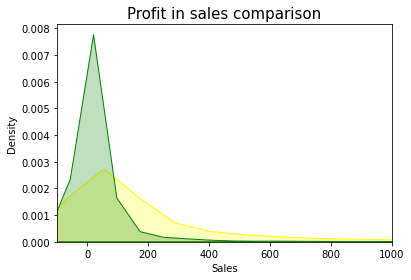

In [25]:
sb.kdeplot(df['Sales'],color = 'yellow', label = 'Sales', shade = True)
sb.kdeplot(df['Profit'],color = 'Green', label = 'Profit', shade = True)
plt.title('Profit in sales comparison',fontsize = 15 )
plt.xlim([-100,1000])
plt.show()

Text(0.5, 1.0, 'Comparing Segment in terms with Postalcode,Sales,Quantity,Discount,Profit')

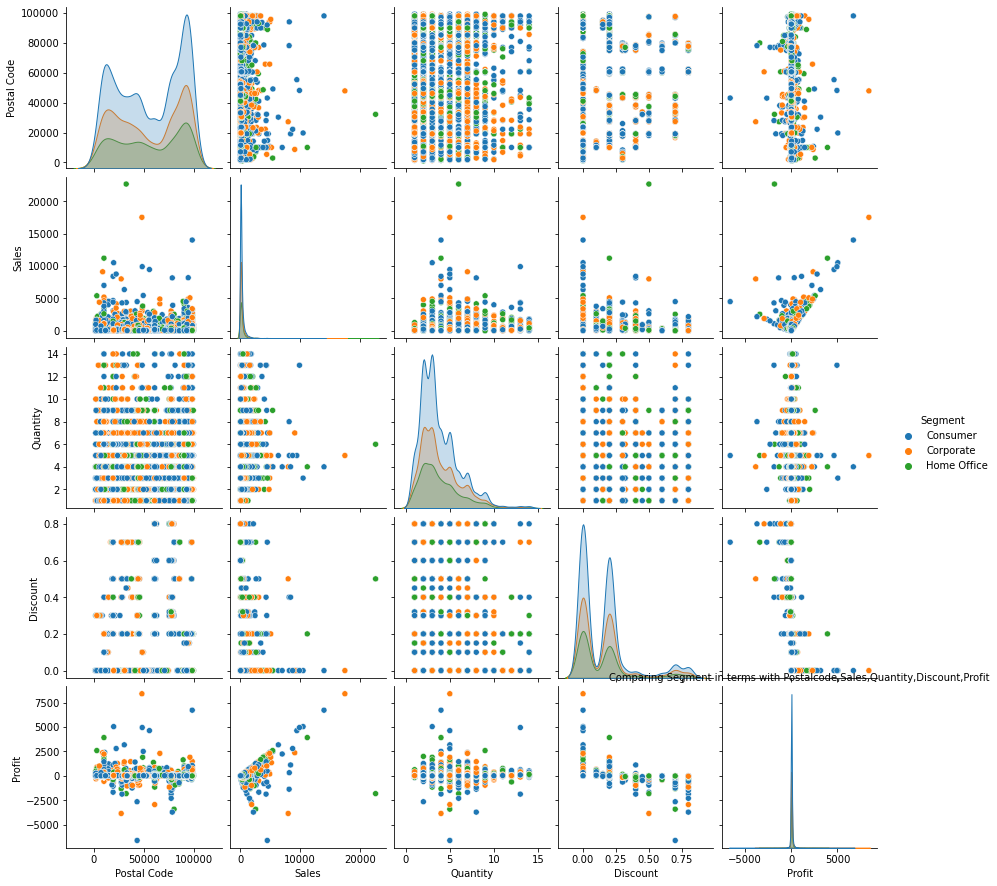

In [26]:
sb.pairplot(df,hue = 'Segment')
plt.title('Comparing Segment in terms with Postalcode,Sales,Quantity,Discount,Profit',fontsize = 10)

Text(0.5, 1.0, 'Comparing Region in terms with Postalcode,Sales,Quantity,Discount,Profit')

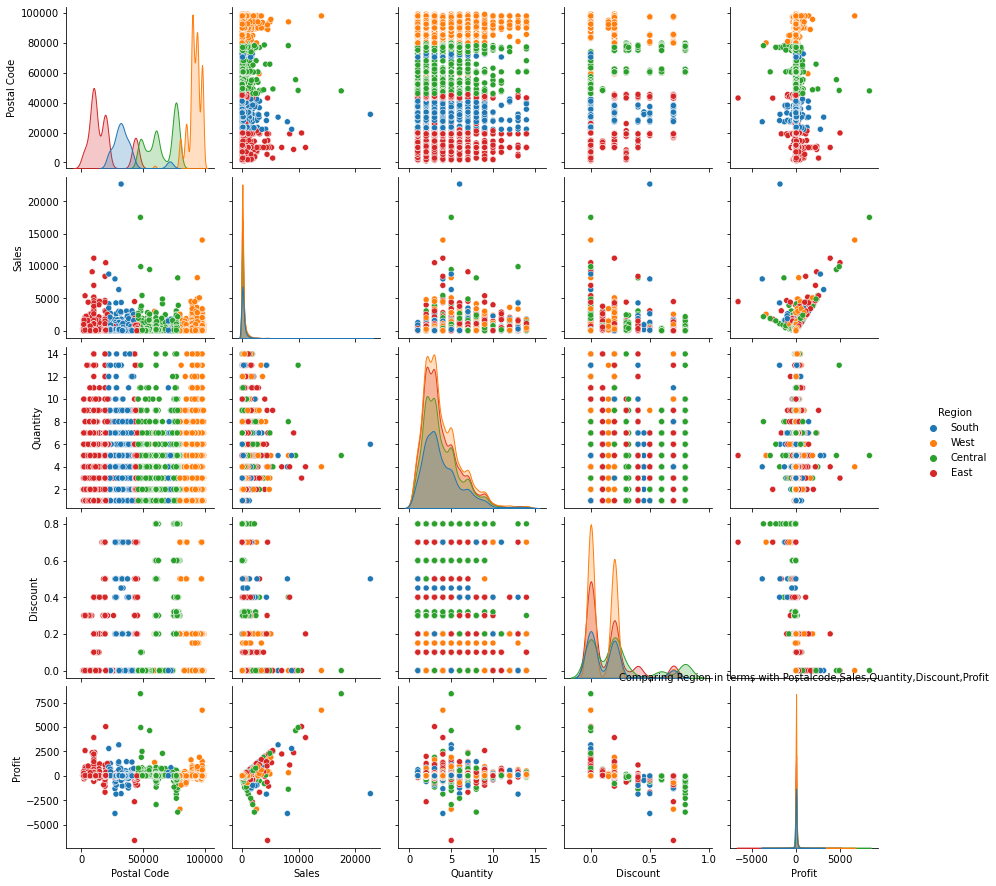

In [27]:
sb.pairplot(df,hue = 'Region')
plt.title('Comparing Region in terms with Postalcode,Sales,Quantity,Discount,Profit',fontsize = 10)

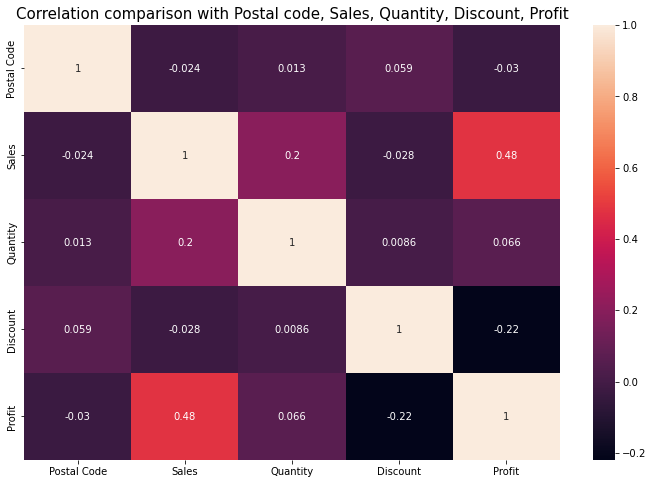

In [28]:
df_corr = df.corr()
plt.figure(figsize = (12,8))
sb.heatmap(df_corr, annot = True)
plt.title('Correlation comparison with Postal code, Sales, Quantity, Discount, Profit',fontsize = 15)
plt.show()

C:\Users\muruganusha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sub-Category')

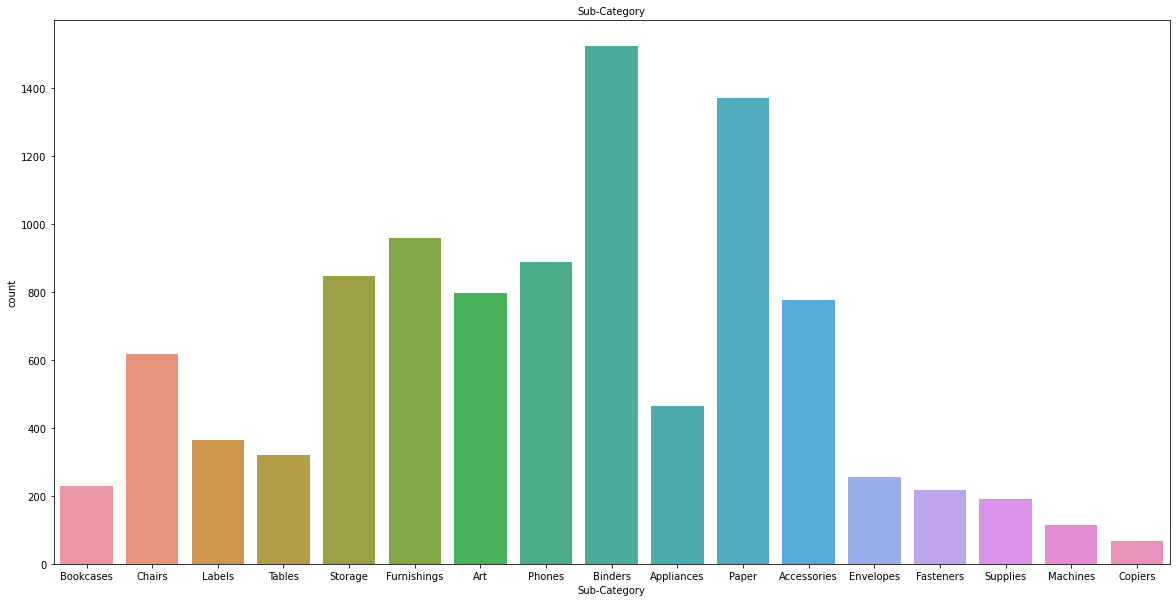

In [11]:
plt.figure(figsize = (20,10))
sb.countplot(df['Sub-Category'])
plt.title('Sub-Category',fontsize = 10)


In [12]:
df_region = df.groupby(['Region'])[['Profit','Sales','Discount']].mean()
df_region

,Profit,Sales,Discount
Region,,,
Central,17.092709,215.772661,0.240353
East,32.135808,238.336110,0.145365
South,28.857673,241.803645,0.147253
West,33.836821,226.488028,0.109369


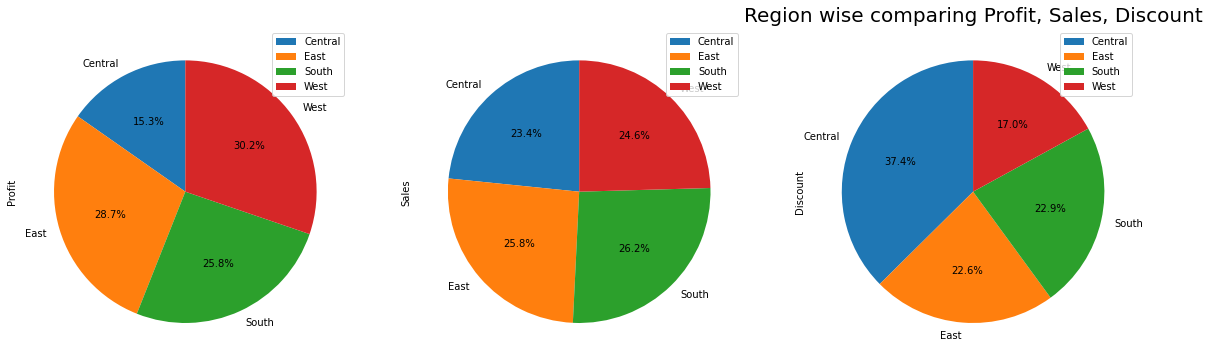

In [19]:
df_region.plot.pie(startangle = 90, labels = df_region.index, autopct = '%1.1f%%',subplots = True, figsize = (20,200))
plt.title('Region wise comparing Profit, Sales, Discount',fontsize = 20)
plt.show()

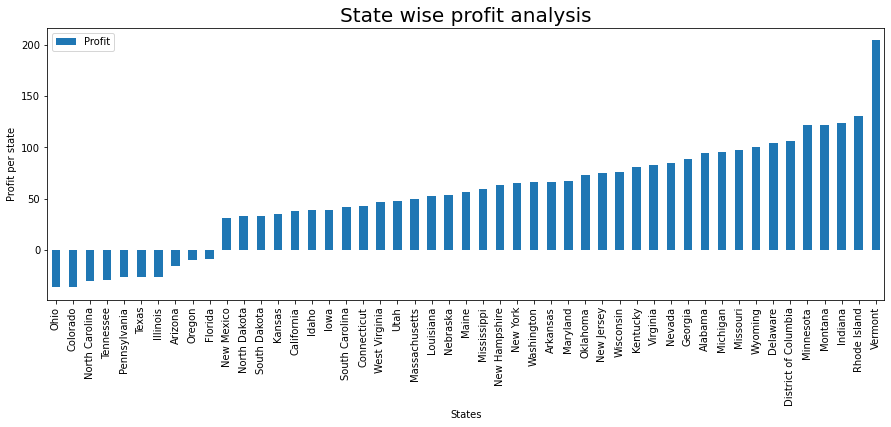

In [20]:
df_meanstate = df.groupby(['State'])[['Sales','Discount','Profit']].mean()
df_sorted = df_meanstate.sort_values('Profit')
df_sorted[['Profit']].plot(kind = 'bar', figsize = (15,5))
plt.title ('State wise profit analysis',fontsize = 20)
plt.xlabel('States')
plt.ylabel('Profit per state')
plt.show()
